# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

Next task: explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [10]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

Load the TikTok dataset.

In [11]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


    Some purpose of EDA:
    - get familiar with dataset (types, size, labels)
    - Understanding which variables are present in the data
    - Reviewing the distribution of features, such as minimum, mean, and maximum values
    - check requirement for any initial data transfornation or reshaping and make such transformation
    - check for missing data and deal with it
    - check for outliers and deal with it
    - Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [12]:
# Drop rows with missing values
data.dropna(inplace=True)
data.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
print(f"Data shape before dropping duplicates: {data.shape}")
print(f"Data shape after dropping duplicates: {data.drop_duplicates().shape}")

Data shape before dropping duplicates: (19084, 12)
Data shape after dropping duplicates: (19084, 12)


Check for and handle outliers.

In [12]:
def plot_boxplot(data, column_name:str, fliersize=2):
    plt.figure(figsize=(6,2))
    sns.boxplot(data=None, x=data[column_name], fliersize=fliersize)
    plt.title(f"Boxplot for {column_name} variable")
    plt.show(); 

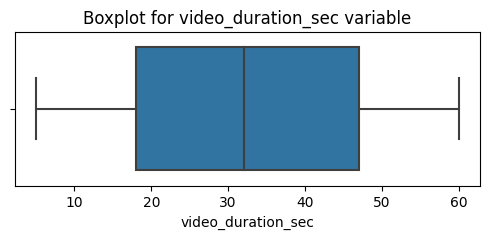

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plot_boxplot(data, "video_duration_sec")

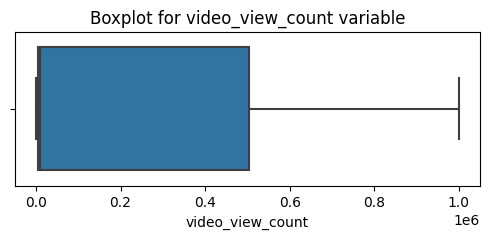

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
plot_boxplot(data, "video_view_count")

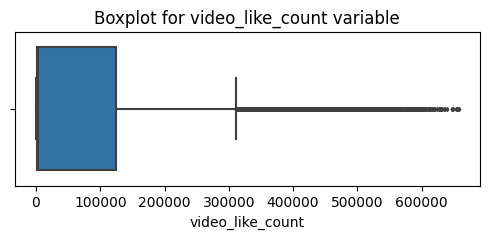

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
plot_boxplot(data, "video_like_count")

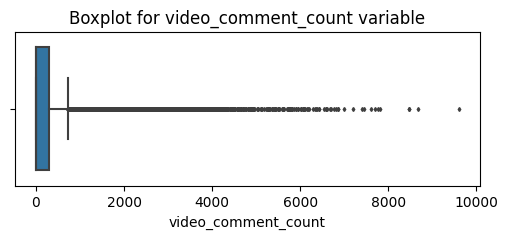

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
plot_boxplot(data, "video_comment_count")

In [13]:
# Check for and handle outliers for video_like_count
precentage_25 = data["video_like_count"].quantile(0.25)
precentage_75 = data["video_like_count"].quantile(0.75)
iqr = precentage_75 - precentage_25

upper_limit = precentage_75 + 1.5 * iqr
data["video_like_count"] = data["video_like_count"].map(lambda x: upper_limit if x > upper_limit else x)
print(f"video_like_count upper limit: {upper_limit}")
maximum_value = data["video_like_count"].max()
print(f"video_like_count max: {maximum_value}")

video_like_count upper limit: 311333.875
video_like_count max: 311333.875


Check class balance.

In [5]:
claims = data.groupby(["verified_status","claim_status"]).count().reset_index()[["verified_status", "claim_status", "#"]]
claims["precentage"] = claims["#"].map(lambda x: (x/claims["#"].sum()*100).round(2))

# Check class balance
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

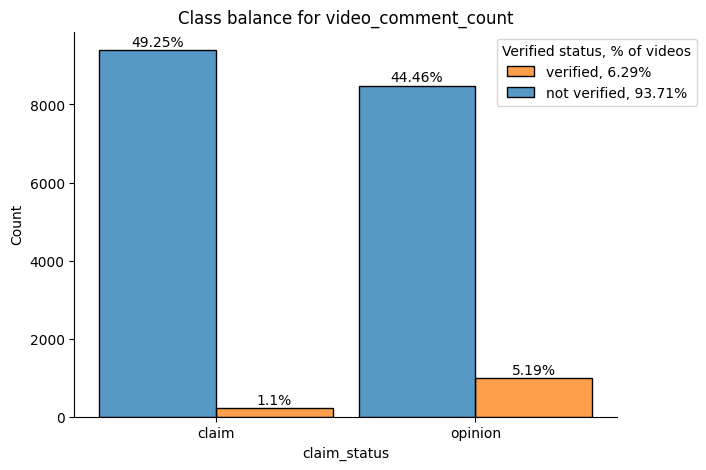

In [233]:
# Check class balance for video_comment_count
plt.figure(figsize=(7,5))
g = sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title("Class balance for video_comment_count");

# Percentege for: "verified + claim", "verified + opinion", "non verified + claim", "non verified + opinion" 
text = [1.10, 5.19, 49.25, 44.46]
verified_total = text[0]  + text[1]
no_verified_total = text[2]  + text[3]

for i, height in enumerate(g.patches):
    plt.text(height.get_x() + height.get_width() / 2, height.get_height() + 100, f'{text[i]}%', ha='center')

plt.legend(title='Verified status, % of videos',
           loc='upper right', bbox_to_anchor=(1.16, 1), ncol=1,
           labels=[f'verified, {verified_total:.2f}%', f'not verified, {no_verified_total:.2f}%'])
sns.despine()
plt.show()

    Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [14]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
minority = data[data["verified_status"] == "verified"]
majority = data[data["verified_status"] == "not verified"]

# Upsample the minority class (which is "verified")
minority_upsample = resample(minority, #data for resample
                             replace=True, #replacement strategy for resampling
                             n_samples=majority.shape[0], #number of samples to generate
                             random_state=42) #random state value

# Combine majority class with upsampled minority class
data_resampled = pd.concat([minority_upsample, majority], axis=0)
data_resampled.drop(["#"], axis=1, inplace=True)
# Display new class counts
data_resampled["verified_status"].value_counts()


verified_status
verified        17884
not verified    17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [9]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
average_text_length = data_resampled[["video_transcription_text", "claim_status"]].copy()
average_text_length["video_transcription_text"] = average_text_length["video_transcription_text"].map(lambda x: len(x))
average_text_length.groupby("claim_status").mean()

,video_transcription_text
claim_status,
claim,95.274333
opinion,82.581333


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [15]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_resampled["text_length"]  = data_resampled["video_transcription_text"].map(lambda x: len(x))

In [11]:
# Display first few rows of dataframe after adding new column
data_resampled.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
18389,opinion,9037966708,49,my colleagues are willing to wager that the el...,verified,active,6359.0,682.0,221.0,5.0,2.0,119
15692,opinion,4620370740,53,my family's belief is that the chicken is the ...,verified,active,4576.0,1452.0,437.0,15.0,5.0,75
18422,opinion,7299256088,36,my colleagues are willing to bet that nucelear...,verified,active,2475.0,243.0,18.0,3.0,1.0,95
18053,opinion,4522903570,53,my family is willing to wager that the voyager...,verified,active,8054.0,1700.0,322.0,32.0,10.0,142
17471,opinion,8972158649,26,i am willing to say that you can fit about 400...,verified,active,3975.0,1626.0,280.0,36.0,10.0,77


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

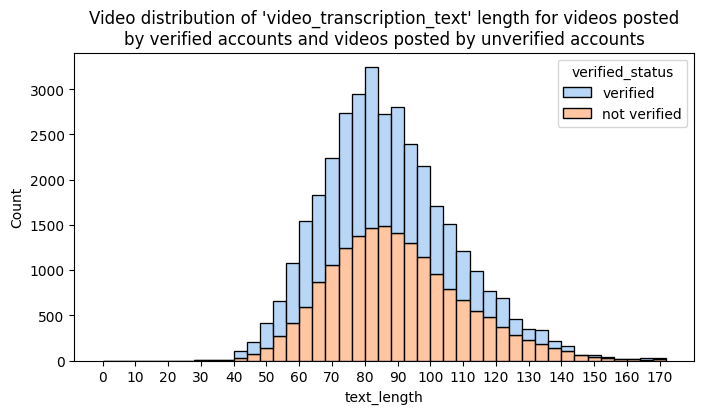

In [23]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts
# and videos posted by unverified accounts. Create two histograms in one plot
plt.figure(figsize=(8,4))
ax = sns.histplot(data=data_resampled, x="text_length", bins=range(0,175,4), 
                  hue="verified_status", 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,175,10))
ax.set_xticklabels(range(0,175,10))
plt.title("Video distribution of 'video_transcription_text' length for videos posted\nby verified accounts and videos posted by unverified accounts");


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [36]:
data_resampled.dtypes

claim_status                        object
video_id                             int64
video_duration_sec                   int64
video_transcription_text            object
verified_status                     object
author_ban_status                   object
video_view_count                   float64
video_like_count                   float64
video_share_count                  float64
video_download_count               float64
video_comment_count                float64
video_transcription_text_length      int64
dtype: object

    Pearson correlation coefficient (PCC)
    0 - no correlation
    -1 and 1 - good correlation

In [16]:
df = data_resampled.copy()
df["claim_status"] = df["claim_status"].astype("category").cat.codes
df.drop("video_transcription_text", axis=1, inplace=True)
df["verified_status"] = df["verified_status"].astype("category").cat.codes
df["author_ban_status"] = df["author_ban_status"].astype("category").cat.codes
df.corr()["verified_status"]

claim_status            0.375791
video_id                0.008998
video_duration_sec     -0.020918
verified_status         1.000000
author_ban_status      -0.123800
video_view_count       -0.305072
video_like_count       -0.269362
video_share_count      -0.199297
video_download_count   -0.225013
video_comment_count    -0.173057
text_length            -0.118838
Name: verified_status, dtype: float64

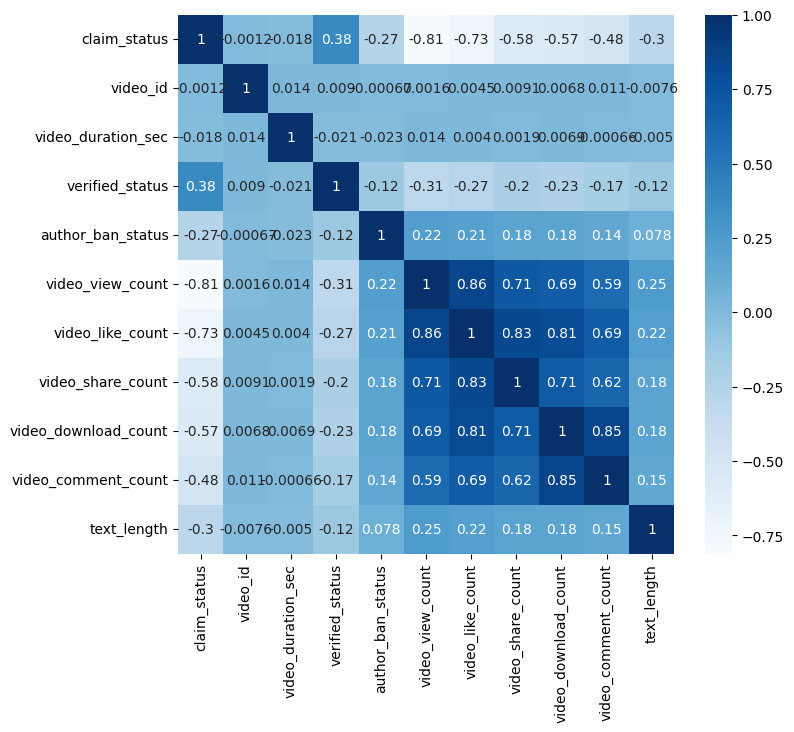

In [31]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize = (8,7))
ax = sns.heatmap(df.corr(), cmap = 'Blues', annot=True)
colorbar = ax.collections[0].colorbar
plt.show();

In [26]:
# Code a correlation matrix to help determine most correlated variables
data_resampled.corr(numeric_only=True)

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_id,1.000000,0.013938,0.001607,0.004534,0.009136,0.006814,0.011346,-0.007634
video_duration_sec,0.013938,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000664,-0.005043
video_view_count,0.001607,0.013892,1.000000,0.855343,0.710466,0.691557,0.585626,0.246867
video_like_count,0.004534,0.004028,0.855343,1.000000,0.832361,0.806369,0.688681,0.217852
video_share_count,0.009136,0.001944,0.710466,0.832361,1.000000,0.709738,0.621048,0.176362
video_download_count,0.006814,0.006930,0.691557,0.806369,0.709738,1.000000,0.852601,0.175287
video_comment_count,0.011346,-0.000664,0.585626,0.688681,0.621048,0.852601,1.000000,0.154423
text_length,-0.007634,-0.005043,0.246867,0.217852,0.176362,0.175287,0.154423,1.000000


Visualize a correlation heatmap of the data.

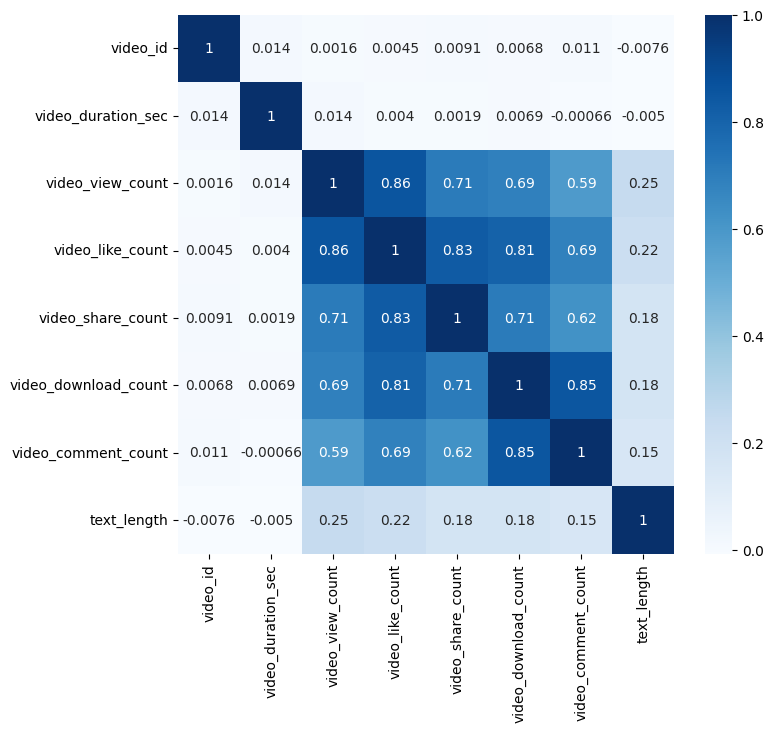

In [28]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize = (8,7))
ax = sns.heatmap(data_resampled.corr(numeric_only=True), cmap = 'Blues', annot=True)
colorbar = ax.collections[0].colorbar
plt.show();

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

    "video_view_count", "video_like_count", "video_share_count", "video_download_count" and "video_comment_count" - all these variables are highly correlated with each other which make it impossible to use together for logistic model. We should chose just one of that features for our model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [17]:
# Select outcome variable
y = data_resampled["verified_status"]

Select the features.

In [34]:
data_resampled.dtypes

claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_length                   int64
dtype: object

In [18]:
# Select features
X = data_resampled[["claim_status", "author_ban_status", "video_duration_sec", "video_view_count", "text_length"]]

# Display first few rows of features dataframe
X.head()

,claim_status,author_ban_status,video_duration_sec,video_view_count,text_length
18389,opinion,active,49,6359.0,119
15692,opinion,active,53,4576.0,75
18422,opinion,active,36,2475.0,95
18053,opinion,active,53,8054.0,142
17471,opinion,active,26,3975.0,77


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [154]:
# Get shape of each training and testing set
print(f"Shape of the X training subset: {X_train.shape}")
print(f"Shape of the X test subset: {X_test.shape}")
print(f"Shape of the y training subset: {y_train.shape}")
print(f"Shape of the y test subset: {y_test.shape}")

Shape of the X training subset: (28614, 5)
Shape of the X test subset: (7154, 5)
Shape of the y training subset: (28614,)
Shape of the y test subset: (7154,)


### **Task 3c. Encode variables**

Check the data types of the features.

In [155]:
# Check data types
X_train.dtypes

claim_status           object
author_ban_status      object
video_duration_sec      int64
video_view_count      float64
text_length             int64
dtype: object

In [156]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [157]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'banned', 'under review'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [22]:
# Select the training features that needs to be encoded
need_to_encode = X_train[["claim_status", "author_ban_status"]].copy()

# Display first few rows
need_to_encode.head()

,claim_status,author_ban_status
17057,opinion,active
1120,claim,active
7177,claim,active
15097,opinion,active
284,claim,active


In [20]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [23]:
# Fit and transform the training features using the encoder
one_hot_encoded = encoder.fit_transform(need_to_encode)

In [25]:
# Get feature names from encoder
features = encoder.get_feature_names_out()
features

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [168]:
# Display first few rows of encoded training features
print(one_hot_encoded[0])

[1. 0. 0.]


In [26]:
# Place encoded training features (which is currently an array) into a dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=features)

# Display first few rows
one_hot_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [27]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped
# (since these features are being transformed to numeric)
X_train.drop(["claim_status", "author_ban_status"], axis=1).reset_index(drop=True)

,video_duration_sec,video_view_count,text_length
0,22,7718.0,47
1,7,783824.0,102
2,7,278116.0,70
3,36,4445.0,118
4,9,201670.0,67
...,...,...,...
28609,25,5324.0,79
28610,23,4445.0,108
28611,17,8925.0,90
28612,50,7093.0,97


In [28]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(["claim_status", "author_ban_status"], axis=1).reset_index(drop=True),
                                        one_hot_encoded_df],axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,22,7718.0,47,1.0,0.0,0.0
1,7,783824.0,102,0.0,0.0,0.0
2,7,278116.0,70,0.0,0.0,0.0
3,36,4445.0,118,1.0,0.0,0.0
4,9,201670.0,67,0.0,0.0,0.0


Check the data type of the outcome variable.

In [176]:
# Check data type of outcome variable
y_train.dtypes


dtype('O')

In [177]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [178]:
# Set up an encoder for one-hot encoding the categorical outcome variable
encoder_2 = OneHotEncoder(drop='first', sparse_output=False)

In [179]:
len(y_train.values.reshape(-1,1))

28614

In [214]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
one_hot_encoded_2 = encoder_2.fit_transform(y_train.values.reshape(-1,1))
y_train_encoded = pd.Series(one_hot_encoded_2.ravel(), name="verified_status")

# Display the encoded training outcome variable
y_train_encoded.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: verified_status, dtype: float64

In [146]:
var = y_train.astype("category").cat.codes.astype(float).reset_index(drop=True)
var

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
25032    1.0
25033    1.0
25034    1.0
25035    1.0
25036    1.0
Length: 25037, dtype: float64

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [239]:
# Construct a logistic regression model and fit it to the training set
model = LogisticRegression().fit(X_train_final, y_train_encoded)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [197]:
# Select the testing features that needs to be encoded
need_to_encode_3 = X_test[["claim_status", "author_ban_status"]].copy()

# Display first few rows
need_to_encode_3.head()

,claim_status,author_ban_status
9163,claim,active
16006,opinion,active
7756,claim,active
9637,opinion,active
9928,opinion,active


In [198]:
# Transform the testing features using the encoder
encoder_3 = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded_3 = encoder_3.fit_transform(need_to_encode_3)

# Display first few rows of encoded testing features
one_hot_encoded_3[:3]

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [199]:
# Place encoded testing features (which is currently an array) into a dataframe
one_hot_encoded_3_df = pd.DataFrame(one_hot_encoded_3, columns=encoder_3.get_feature_names_out())

# Display first few rows
one_hot_encoded_3_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [208]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(["claim_status", "author_ban_status"], axis=1).reset_index(drop=True)

,video_duration_sec,video_view_count,text_length
0,56,194954.0,103
1,21,2290.0,130
2,50,939926.0,109
3,43,4393.0,60
4,36,397.0,60
...,...,...,...
7149,15,151143.0,131
7150,40,8345.0,77
7151,53,8874.0,61
7152,15,174931.0,82


In [209]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_encoded = pd.concat([data, one_hot_encoded_df], axis=1)

# Display first few rows
X_test_final = pd.concat([X_test.drop(["claim_status", "author_ban_status"], axis=1).reset_index(drop=True),
                           one_hot_encoded_3_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,56,194954.0,103,0.0,0.0,0.0
1,21,2290.0,130,1.0,0.0,0.0
2,50,939926.0,109,0.0,0.0,0.0
3,43,4393.0,60,1.0,0.0,0.0
4,36,397.0,60,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [240]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = model.predict(X_test_final)

Display the predictions on the encoded testing set.

In [211]:
# Display the predictions on the encoded testing set
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [212]:
# Display the true labels of the testing set
y_test

9163     not verified
16006        verified
7756     not verified
9637     not verified
9928     not verified
             ...     
8377     not verified
13588        verified
12646    not verified
8453     not verified
13869    not verified
Name: verified_status, Length: 7154, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [216]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
encoder_4 = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded_4 = encoder_4.fit_transform(y_test.values.reshape(-1,1))
y_test_encoded = pd.Series(one_hot_encoded_4.ravel(), name="verified_status")

# Display the encoded testing outcome variable
y_test_encoded.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: verified_status, dtype: float64

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [242]:
# Get shape of each training and testing set
print(f"Shape of the X training subset: {X_train_final.shape}")
print(f"Shape of the X test subset: {X_test_final.shape}")
print(f"Shape of the y training subset: {y_train_encoded.shape}")
print(f"Shape of the y test subset: {y_test_encoded.shape}")

Shape of the X training subset: (28614, 6)
Shape of the X test subset: (7154, 6)
Shape of the y training subset: (28614,)
Shape of the y test subset: (7154,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

[[1531 2074]
 [ 507 3042]]


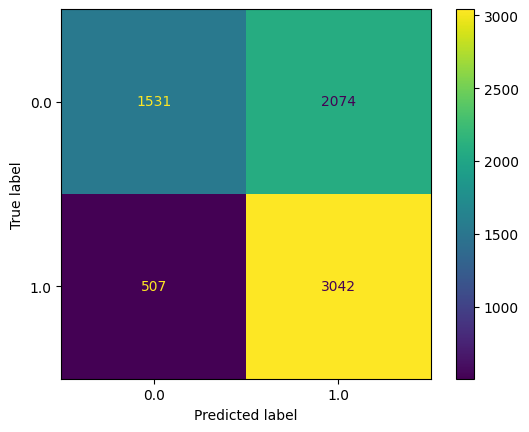

In [243]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test_encoded, y_pred, labels = model.classes_)
print(cm)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [244]:
# Create a classification report
print(f"Model precision score: {metrics.precision_score(y_test_encoded, y_pred)}")
print(f"Model recall score: {metrics.recall_score(y_test_encoded, y_pred)}")
print(f"Model accuracy score: {metrics.accuracy_score(y_test_encoded, y_pred)}")
print(f"Model f1-score: {metrics.f1_score(y_test_encoded, y_pred)}")

Model precision score: 0.5946051602814699
Model recall score: 0.8571428571428571
Model accuracy score: 0.6392228124126362
Model f1-score: 0.7021350259665319


### **Task 4c. Interpret model coefficients**

In [232]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(model.coef_, columns=X_test_final.columns).T

,0
video_duration_sec,0.001391
video_view_count,-0.000002
text_length,0.003612
claim_status_opinion,0.000060
author_ban_status_banned,-0.000002
author_ban_status_under review,-0.000001


In [247]:
target_labels = ["verified", "not verified"]
print(metrics.classification_report(y_test_encoded, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.42      0.54      3605
not verified       0.59      0.86      0.70      3549

    accuracy                           0.64      7154
   macro avg       0.67      0.64      0.62      7154
weighted avg       0.67      0.64      0.62      7154



### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

    As we can see, the model perfoemance is not on the very high level.  Precision is about 60%, so we cannot predict correctly more than 40% of the data. Although negative class (not verified) we can predicted better (about 86%). Such performance maybe result of the initial uneven distristribution in the dataset.  
      
    As the final result accuracy of the model is less than 64% and f1-score: 0.70